In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import statsmodels.api as sm
import sklearn
import datetime
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

# 缺失值处理
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
high_value = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/capstone/high_value.csv', sep=',')
high_value = high_value.drop(['Unnamed: 0'],axis=1)
high_value

,Customer_id,age,PBK_Ind,Gender,Cust_Segment,YearsAfterFirstContact,Attrition_or_not,InterCorpACIndicator,Number_Children,tenure,oversea_flag_prob,online_flag_prob,alipay_prob,tenpay_prob,applepay_prob,spending_trans_counts,spending_BILL_TOTAL,installment_trans_counts,installment_BILL_TOTAL,repayment_trans_counts,repayment_BILL_TOTAL,fee_trans_counts,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,Product_Code_QDUT,FUM_LCY_QDUT,Product_Code_Ins,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap,product_or_not,total_credit_counts,LR_Prob,clf_Prob,RF_Prob,XGB_Prob,LR_Prob_category,clf_Prob_category,RF_Prob_category,XGB_Prob_category,average_probability,average_probability_category,average_category,predict_category,R,F,M,RFM,label
0,500999800895910,38.0,1,1,5,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.069444,0.000000,60.0,83164.93,1.0,-43288.04,5.0,-37366.00,3.0,973.92,3.0,21644.04,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,72.0,0.003083,0.010319,0.00,0.009772,1.0,1.0,1.0,1.0,0.005793,1.0,1.00,1.0,0.031783,0.005313,0.001503,0.038598,1
1,500999800818899,30.0,0,1,2,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,88485.20,1.0,-15700.00,4.0,-89919.14,1.0,125.60,1.0,1308.34,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,10.0,0.073682,0.053394,0.02,0.048018,1.0,1.0,1.0,1.0,0.048773,1.0,1.00,1.0,0.031783,0.000266,0.001557,0.033606,1
2,500999801040158,31.0,0,1,2,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,64005.01,0.0,0.00,6.0,-32484.84,0.0,0.00,0.0,0.00,1.0,-157.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,15.0,0.012465,0.010319,0.00,0.006548,1.0,1.0,1.0,1.0,0.007333,1.0,1.00,1.0,0.000000,0.000708,0.001305,0.002014,0
3,500999800933280,24.0,0,0,2,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,28530.98,0.0,0.00,7.0,-17744.14,3.0,282.60,0.0,0.00,0.0,0.0,7.0,3023.100,3.0,14130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.014244,0.038349,0.00,0.045799,1.0,1.0,1.0,1.0,0.024598,1.0,1.00,1.0,0.031783,0.000886,0.000940,0.033608,1
4,500999801014287,30.0,0,1,2,0,0,0,0.0,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,29.0,27464.70,0.0,0.00,3.0,-4161.44,0.0,0.00,0.0,0.00,0.0,0.0,1.0,423.960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,33.0,0.050923,0.000000,0.00,0.008348,1.0,1.0,1.0,1.0,0.014818,1.0,1.00,1.0,0.000000,0.002568,0.000929,0.003497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82167,500999800604403,31.0,0,1,4,2,0,0,0.0,2.0,0.000000,0.000000,0.038710,0.038710,0.000000,128.0,103988.71,3.0,-28147.12,14.0,-76192.10,4.0,201.84,4.0,4520.39,2.0,-188.4,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,155.0,0.000859,0.010319,0.00,0.002379,1.0,1.0,1.0,1.0,0.003389,1.0,1.00,1.0,0.063565,0.011335,0.001717,0.076617,2
82168,500999800692034,24.0,1,1,5,1,0,0,0.0,1.0,0.000000,0.000000,0.027273,0.027273,0.027273,193.0,299314.73,1.0,-12098.04,19.0,-290389.65,2.0,241.96,2.0,8065.37,3.0,-251.2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,905479.92,0.0,1.0,220.0,0.000005,0.010319,0.00,0.003375,1.0,1.0,1.0,1.0,0.003425,1.0,1.00,1.0,0.031783,0.017091,0.003728,0.052601,1
82169,500999800830863,61.0,0,1,2,1,0,0,1.0,1.0,0.164179,0.082090,0.082090,0.000000,0.000000,35.0,64001.18,3.0,-58732.82,16.0,-114621.33,35.0,3913.29,16.0,19220.86,0.0,0.0,12.0,7290.635,17.0,111470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,134.0,0.000807,0.010319,0.01,0.005926,1.0,1.0,1.0,1.0,0.006763,1.0,1.00,1.0,0.031783,0.003099,0.001305,0.036187,1
82170,500999801061071,24.0,1,0,2,0,0,0,0.0,0.0,0.000000,0.000000,0.14

In [ ]:
high_value['label'].value_counts()

1    51317
0    19610
2     6771
3     2455
4     1471
5      548
Name: label, dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'age')

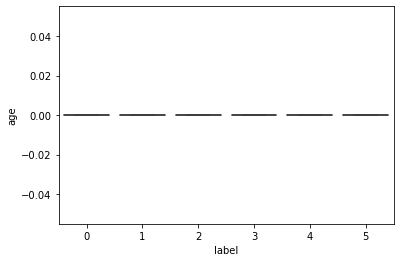

In [ ]:
sns.boxplot(high_value['label'], high_value['Number_Children'],showfliers=False)
plt.xlabel('label')
plt.ylabel('age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'YearsAfterFirstContact')

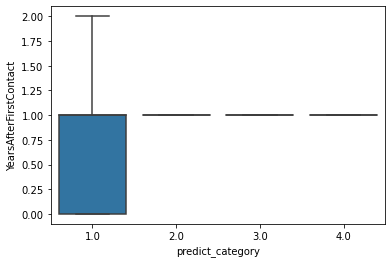

In [ ]:
sns.boxplot(high_value['average_probability_category'], high_value['YearsAfterFirstContact'],showfliers=False)
plt.xlabel('predict_category')
plt.ylabel('YearsAfterFirstContact')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_trans_counts')

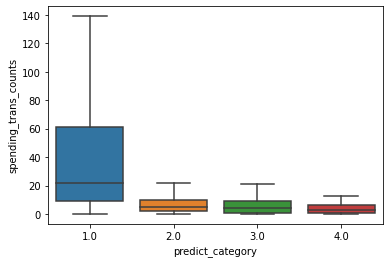

In [ ]:
sns.boxplot(high_value['average_probability_category'], high_value['spending_trans_counts'],showfliers=False)
plt.xlabel('predict_category')
plt.ylabel('spending_trans_counts')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_BILL_TOTAL')

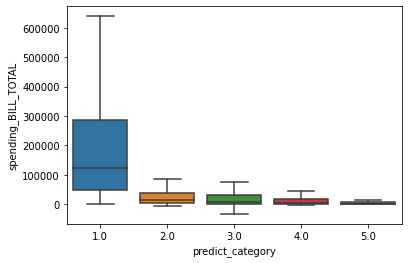

In [ ]:
sns.boxplot(high_value['predict_category'], high_value['spending_BILL_TOTAL'],showfliers=False)
plt.xlabel('predict_category')
plt.ylabel('spending_BILL_TOTAL')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'YearsAfterFirstContact')

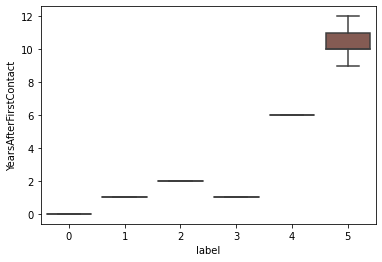

In [ ]:
sns.boxplot(high_value['label'], high_value['YearsAfterFirstContact'],showfliers=False)
plt.xlabel('clusters')
plt.ylabel('YearsAfterFirstContact')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_trans_counts')

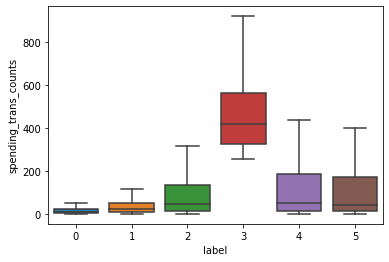

In [ ]:
sns.boxplot(high_value['label'], high_value['spending_trans_counts'],showfliers=False)
plt.xlabel('label')
plt.ylabel('spending_trans_counts')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'spending_BILL_TOTAL')

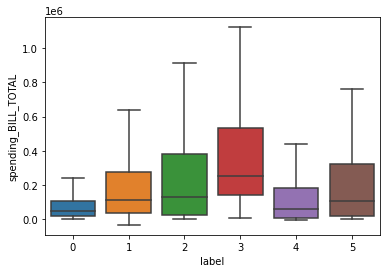

In [ ]:
sns.boxplot(high_value['label'], high_value['spending_BILL_TOTAL'],showfliers=False)
plt.xlabel('label')
plt.ylabel('spending_BILL_TOTAL')

In [ ]:
DDTN = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_DDTNJNP.txt", sep='|',header=None, encoding = 'gb18030', names=["Customer_id", "Acct_id", "Transaction date", "Transaction currency", "Transaction amount", "Transaction amount RMB", "Transaction amount original currency", "Transaction type", "product_code"])
DDacct = pd.read_csv("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_DD_Acct_20170630.txt", sep='|',header=None, encoding = 'gb18030', names=["Product type", "Customer_id", "Acct_id", "Account open date", "Account currency", "Account original currency", "Balance original currency", "Balance RMB", "Month average balance"])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
TD_Holding = pd.read_table("/content/gdrive/MyDrive/capstone HSBC Lifecycle/data/NYU_TD_Holding_20170630.txt",  sep='|',header=None, names=["Product_Class_TD", "Customer_id", "Acct_id", "ACOpenDate_TD", "Currency_TD", "RCYEOD_TD", "LCYEOD_TD", "MTDAVG_TD", "Term_TD","Startdate_TD","Duedate_TD"])

In [ ]:
DDbalance1 = DDacct[["Customer_id", "Acct_id", "Balance RMB"]]
DDbalance = DDbalance1.groupby(['Customer_id'], as_index = False)['Balance RMB'].sum()
TDbalance1 = TD_Holding[["Customer_id", "Acct_id", 'LCYEOD_TD']]
TDbalance = TDbalance1.groupby(['Customer_id'], as_index = False)['LCYEOD_TD'].sum()

In [ ]:
features = high_value.merge(DDbalance, how = 'left', on = "Customer_id")
features = features.merge(TDbalance, how = 'left', on = "Customer_id")

In [ ]:
features['Balance RMB'].fillna(0,inplace=True)
features['LCYEOD_TD'].fillna(0,inplace=True)

In [ ]:
features

,Customer_id,age,PBK_Ind,Gender,Cust_Segment,YearsAfterFirstContact,Attrition_or_not,InterCorpACIndicator,Number_Children,tenure,oversea_flag_prob,online_flag_prob,alipay_prob,tenpay_prob,applepay_prob,spending_trans_counts,spending_BILL_TOTAL,installment_trans_counts,installment_BILL_TOTAL,repayment_trans_counts,repayment_BILL_TOTAL,fee_trans_counts,fee_BILL_TOTAL,others_trans_counts,others_BILL_TOTAL,Cash rebate_trans_counts,Cash rebate_BILL_TOTAL,interest_trans_counts,interest_BILL_TOTAL,cash advance_trans_counts,cash advance_BILL_TOTAL,Product_Code_QDUT,FUM_LCY_QDUT,Product_Code_Ins,Term_Ins,Market_Value_Ins,Acct_CPI_num,MTDAVG_CPI,Term_CPI,Acct_TD_num,MTDAVG_TD,TD_TimeGap,product_or_not,total_credit_counts,LR_Prob,clf_Prob,RF_Prob,XGB_Prob,LR_Prob_category,clf_Prob_category,RF_Prob_category,XGB_Prob_category,average_probability,average_category,predict_category,R,F,M,RFM,label,Balance RMB,LCYEOD_TD
0,500999800895910,38.0,1,1,5,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.069444,0.000000,60.0,83164.93,1.0,-43288.04,5.0,-37366.00,3.0,973.92,3.0,21644.04,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,72.0,0.002751,0.011868,0.00,0.010291,1.0,1.0,1.0,1.0,0.006228,1.00,1.0,0.031783,0.005313,0.001503,0.038598,1,0.00,0.00
1,500999800818899,30.0,0,1,2,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,88485.20,1.0,-15700.00,4.0,-89919.14,1.0,125.60,1.0,1308.34,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,10.0,0.074864,0.011868,0.02,0.057972,1.0,1.0,1.0,1.0,0.041176,1.00,1.0,0.031783,0.000266,0.001557,0.033606,1,0.00,0.00
2,500999801040158,31.0,0,1,2,0,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.0,64005.01,0.0,0.00,6.0,-32484.84,0.0,0.00,0.0,0.00,1.0,-157.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,15.0,0.013339,0.013364,0.00,0.007594,1.0,1.0,1.0,1.0,0.008574,1.00,1.0,0.000000,0.000708,0.001305,0.002014,0,0.00,0.00
3,500999800933280,24.0,0,0,2,1,0,0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,28530.98,0.0,0.00,7.0,-17744.14,3.0,282.60,0.0,0.00,0.0,0.0,7.0,3023.100,3.0,14130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,30.0,0.013730,0.031343,0.02,0.045228,1.0,1.0,1.0,1.0,0.027575,1.00,1.0,0.031783,0.000886,0.000940,0.033608,1,0.00,0.00
4,500999801014287,30.0,0,1,2,0,0,0,0.0,0.0,0.090909,0.000000,0.000000,0.000000,0.000000,29.0,27464.70,0.0,0.00,3.0,-4161.44,0.0,0.00,0.0,0.00,0.0,0.0,1.0,423.960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,33.0,0.050602,0.000000,0.01,0.007233,1.0,1.0,1.0,1.0,0.016959,1.00,1.0,0.000000,0.002568,0.000929,0.003497,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81794,500999800604403,31.0,0,1,4,2,0,0,0.0,2.0,0.000000,0.000000,0.038710,0.038710,0.000000,128.0,103988.71,3.0,-28147.12,14.0,-76192.10,4.0,201.84,4.0,4520.39,2.0,-188.4,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,155.0,0.000872,0.011868,0.00,0.002069,1.0,1.0,1.0,1.0,0.003702,1.00,1.0,0.063565,0.011335,0.001717,0.076617,2,0.00,0.00
81795,500999800692034,24.0,1,1,5,1,0,0,0.0,1.0,0.000000,0.000000,0.027273,0.027273,0.027273,193.0,299314.73,1.0,-12098.04,19.0,-290389.65,2.0,241.96,2.0,8065.37,3.0,-251.2,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,905479.92,0.0,1.0,220.0,0.000007,0.011868,0.00,0.003956,1.0,1.0,1.0,1.0,0.003958,1.00,1.0,0.031783,0.017091,0.003728,0.052601,1,342449.34,1716619.41
81796,500999800830863,61.0,0,1,2,1,0,0,1.0,1.0,0.164179,0.082090,0.082090,0.000000,0.000000,35.0,64001.18,3.0,-58732.82,16.0,-114621.33,35.0,3913.29,16.0,19220.86,0.0,0.0,12.0,7290.635,17.0,111470.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,134.0,0.000679,0.031343,0.01,0.008058,1.0,1.0,1.0,1.0,0.012520,1.00,1.0,0.031783,0.003099,0.001305,0.036187,1,0.00,0.00
81797,5009998

In [ ]:
max(features['age'])

76.0

In [ ]:
xg_feature = ['age', 'PBK_Ind', 'Gender', 'InterCorpACIndicator','Number_Children','oversea_flag_prob', 'online_flag_prob', 'alipay_prob', 'tenpay_prob', 'applepay_prob','Balance RMB','LCYEOD_TD']

In [ ]:
xg_feature = ['PBK_Ind', 'Gender', 'InterCorpACIndicator']

In [ ]:
prob_RFM['predict_category'].value_counts()

1.0    24380
2.0      218
3.0       19
4.0        5
Name: predict_category, dtype: int64

In [ ]:
prob_RFM['label'].value_counts()

1    18645
2     3298
0     2127
3      351
4      201
Name: label, dtype: int64

In [ ]:
prob_RFM.groupby(['predict_category', 'label']).size().sort_values()

predict_category  label
4.0               2            1
3.0               2            2
4.0               1            2
                  4            2
2.0               4            6
                  3            7
3.0               1           17
2.0               2           49
                  1          156
1.0               4          193
                  3          344
                  0         2127
                  2         3246
                  1        18470
dtype: int64

In [ ]:
predict_mean = high_value.groupby(['label']).mean()
predict_mean = predict_mean.drop(['Customer_id'],axis=1)

In [ ]:
predict_mean['spending_BILL_TOTAL']

label
0     84560.962531
1    209390.938374
2    278410.694987
3    424690.829373
4    167823.522417
5    252847.595447
Name: spending_BILL_TOTAL, dtype: float64

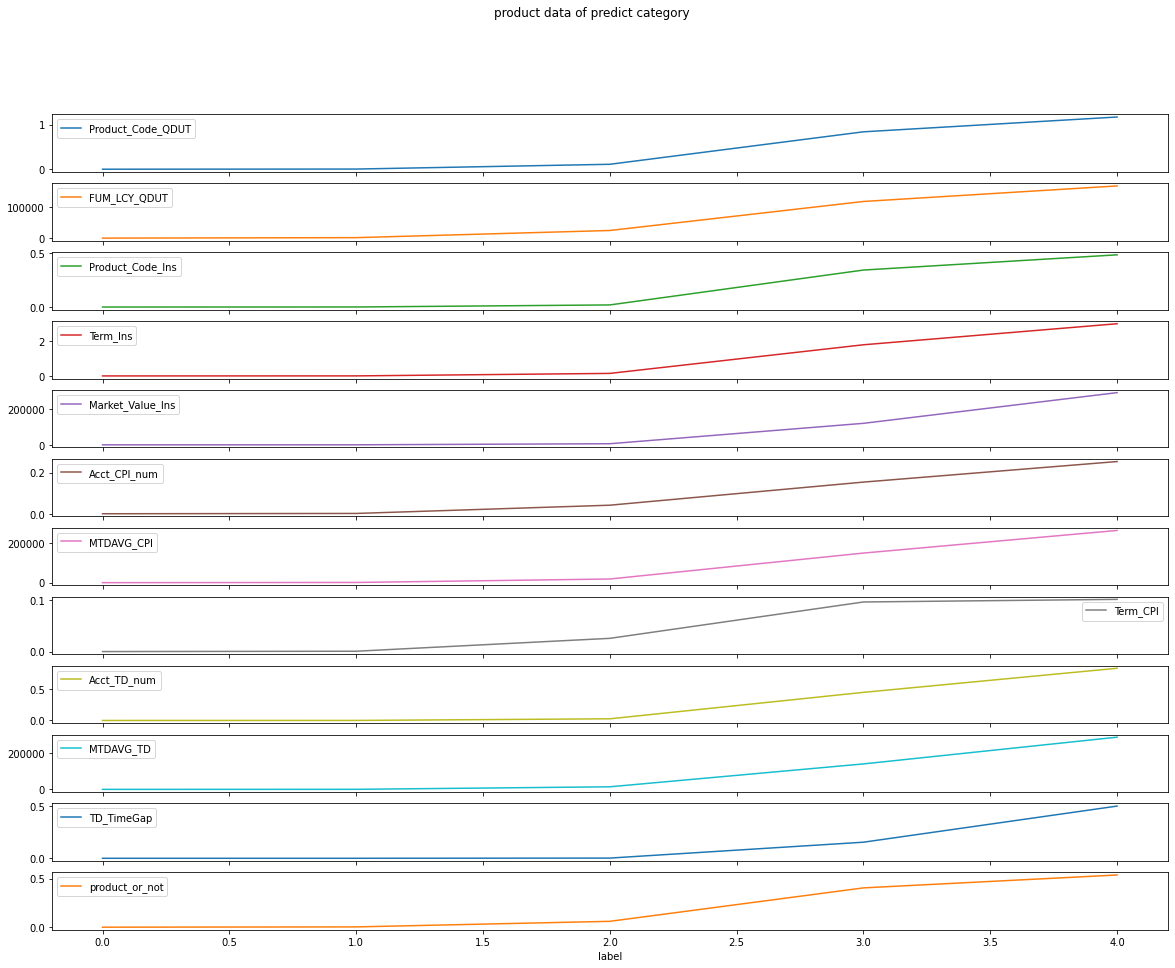

In [ ]:
axes = predict_mean[['Product_Code_QDUT', 'FUM_LCY_QDUT', 'Product_Code_Ins', 'Term_Ins', 'Market_Value_Ins', 'Acct_CPI_num', 'MTDAVG_CPI', 'Term_CPI', 'Acct_TD_num','MTDAVG_TD', 'TD_TimeGap', 'product_or_not']] \
        .plot.line(subplots=True, figsize=(20,15), title='product data of predict category')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [ ]:
X = prob_RFM.drop(columns=['Cust_Segment','Customer_id','Attrition_or_not', 'label'])
y = prob_RFM['label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_standardized =  scaler.transform(X)

In [ ]:
feature = X.columns

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)

print(confusion_matrix(y_test, y_predict_knn))
print(classification_report(y_test, y_predict_knn)) 
print(knn.predict_proba(X_test)[:,1])

# # perform permutation importance
# results = permutation_importance(knn, X_test, y_test, scoring='accuracy')
# # get importance
# importance = results.importances_mean

# plt.figure(figsize=(15,4),dpi=85)
# plt.bar(feature, importance)
# plt.xticks(rotation=90)
# plt.show()

ValueError: ignored